In [12]:
import pandas as pd                                  #Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)

# DATA COLLECTION & CLEANING

In [3]:
df = pd.read_csv("adult.csv.zip")  #reading in the csv file into a Pandas Data Frame
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
df.shape  #checked to see shape of dataset

(32561, 15)

In [14]:
df.info()  #wanted to see overall dataset types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df[df['age'] == 41]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
64,41,Private,132222,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,40,United-States,>50K
72,41,Local-gov,297248,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,45,United-States,>50K
76,41,?,27187,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,0,2415,12,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32414,41,Private,185660,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32441,41,Private,206878,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
32447,41,Self-emp-not-inc,168098,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
32486,41,Private,201495,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
df.columns  #checking all the columns of the dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [25]:
df.columns = df.columns.map(lambda x: x.replace('.', '_'))  #changing the periods to underscores

In [27]:
df.columns  #checked to see new columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [26]:
for x in df.columns:                                    #changing all the "?" values into None Type
    df[x] = np.where(df[x] =='?', None, df[x])

/Users/jasonjoseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [28]:
df.isnull().sum()  #checked to see which columns had null values and how many of those

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [7]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [9]:
df.income.value_counts(normalize = True)  #checked to see imbalance in dataset

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [10]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [11]:
df.income.describe()

count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object

In [23]:
df['age'].nunique() #checked to see number of unique values in age column

73

In [21]:
df.workclass.unique()  #checked to see different unique values under workclass column

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [30]:
df['over_50k'] = np.where(df['income']=='>50K', 1, 0)

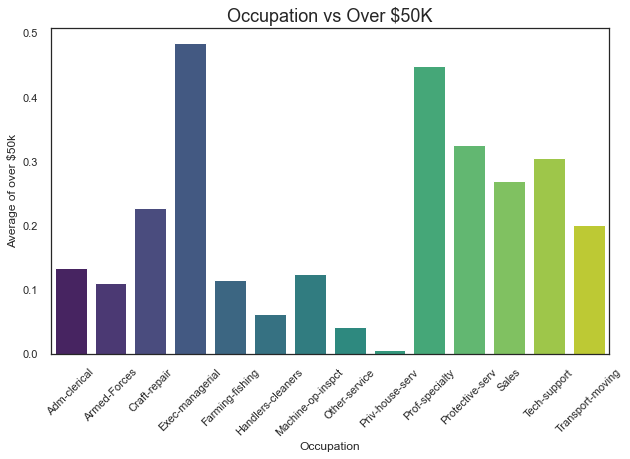

In [34]:
plt.figure(figsize = (10,6))
y = df.groupby(['occupation']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='viridis')
sns.set(style='white')
plt.title('Occupation vs Over $50K', fontsize=18);
plt.xlabel('Occupation');
plt.xticks(rotation=45)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

In [35]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

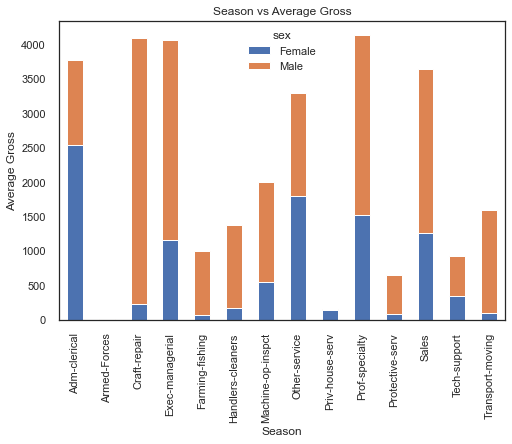

In [36]:
df.groupby(['occupation','sex']).occupation.count().unstack().plot.bar(stacked=True);
plt.title('Season vs Average Gross');
plt.xlabel('Season');
plt.ylabel('Average Gross');

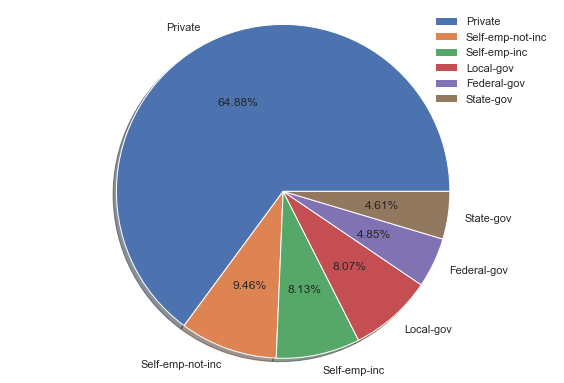

In [39]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()